> # # **Project Details:**

🌍📊 I conducted an in-depth analysis of the factors that contribute to our happiness based on real-time data from the World Happiness Report. 📈✨

The attributes that contribute to our happiness are as follows:

1) Happiness Score: It is a happiness Index which comprehensive survey instrument that assesses happiness, wellbeing, and aspects of sustainability and resilience.

2) Whisker High: Lower Confidence Interval of the Happiness Score.

3) Whisker low: Upper Confidence Interval of the Happiness Score.

4) Dystopia + Residual: It establishes a baseline for comparison, combining scores from a hypothetical dystopian society and any remaining unexplained factors.Even wost or tough times how they can take it things easily

5) GDP per capita: This indicates the economic wealth each person has on average by dividing the Gross Domestic Product (GDP) by the country's population. It provides insights into the economic well-being of individuals.

6) Social Support: It reflects the level of support and assistance individuals receive from their family, friends, and community, emphasizing the importance of reliable relationships during challenging times.

7) Healthy Life Expectancy: It represents the average number of years a person can expect to live in good health, taking into account healthcare access, lifestyle choices, and overall well-being.

8) Freedom to Make Life Choices: It measures the extent to which individuals have the freedom to make their own decisions, encompassing personal freedoms, political rights, and opportunities for self-expression.

9) Generosity: It reflects the willingness of individuals to help others and contribute to societal well-being through acts of kindness, donations, and volunteering.

10) Perceptions of Corruption: This attribute measures the perceived existence of corruption within the government and society, influencing people's trust in public institutions, fairness, and integrity.


Through this analysis, discovered that these attributes significantly impact our happiness. However, not only these attributes but remember that our mindset and the way we approach life also play crucial roles. Let's prioritize positivity, spread love, and face even the toughest times with resilience. 🌟❤️


**Load Libraries**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Load Data**

In [2]:
df = pd.read_csv('/kaggle/input/world-happiness-report-2022/World Happiness Report 2022.csv')
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


**File structure**

In [3]:
df.shape


(146, 12)

**File Datatypes**

In [4]:
df.dtypes

RANK                                            int64
Country                                        object
Happiness score                               float64
Whisker-high                                  float64
Whisker-low                                   float64
Dystopia (1.83) + residual                    float64
Explained by: GDP per capita                  float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
dtype: object

**Missing Values**

In [5]:
df.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64

**Renaming column names**

In [6]:
df = df.rename(columns = {'Dystopia (1.83) + residual': 'Dystopia.Res', 
                 'Explained by: GDP per capita':'GDP per capita', 'Explained by: Social support':'Social support', 
                 'Explained by: Healthy life expectancy': 'Healthy life expectancy',
                 'Explained by: Freedom to make life choices':'Freedom to make life choices',
                 'Explained by: Generosity': 'Generosity', 'Explained by: Perceptions of corruption': 'Perceptions of corruption'})
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia.Res,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


**File content and discription**

In [7]:
df.iloc[:,2:]


,Happiness score,Whisker-high,Whisker-low,Dystopia.Res,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...
141,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


**Finding Outilers using Boxplot**

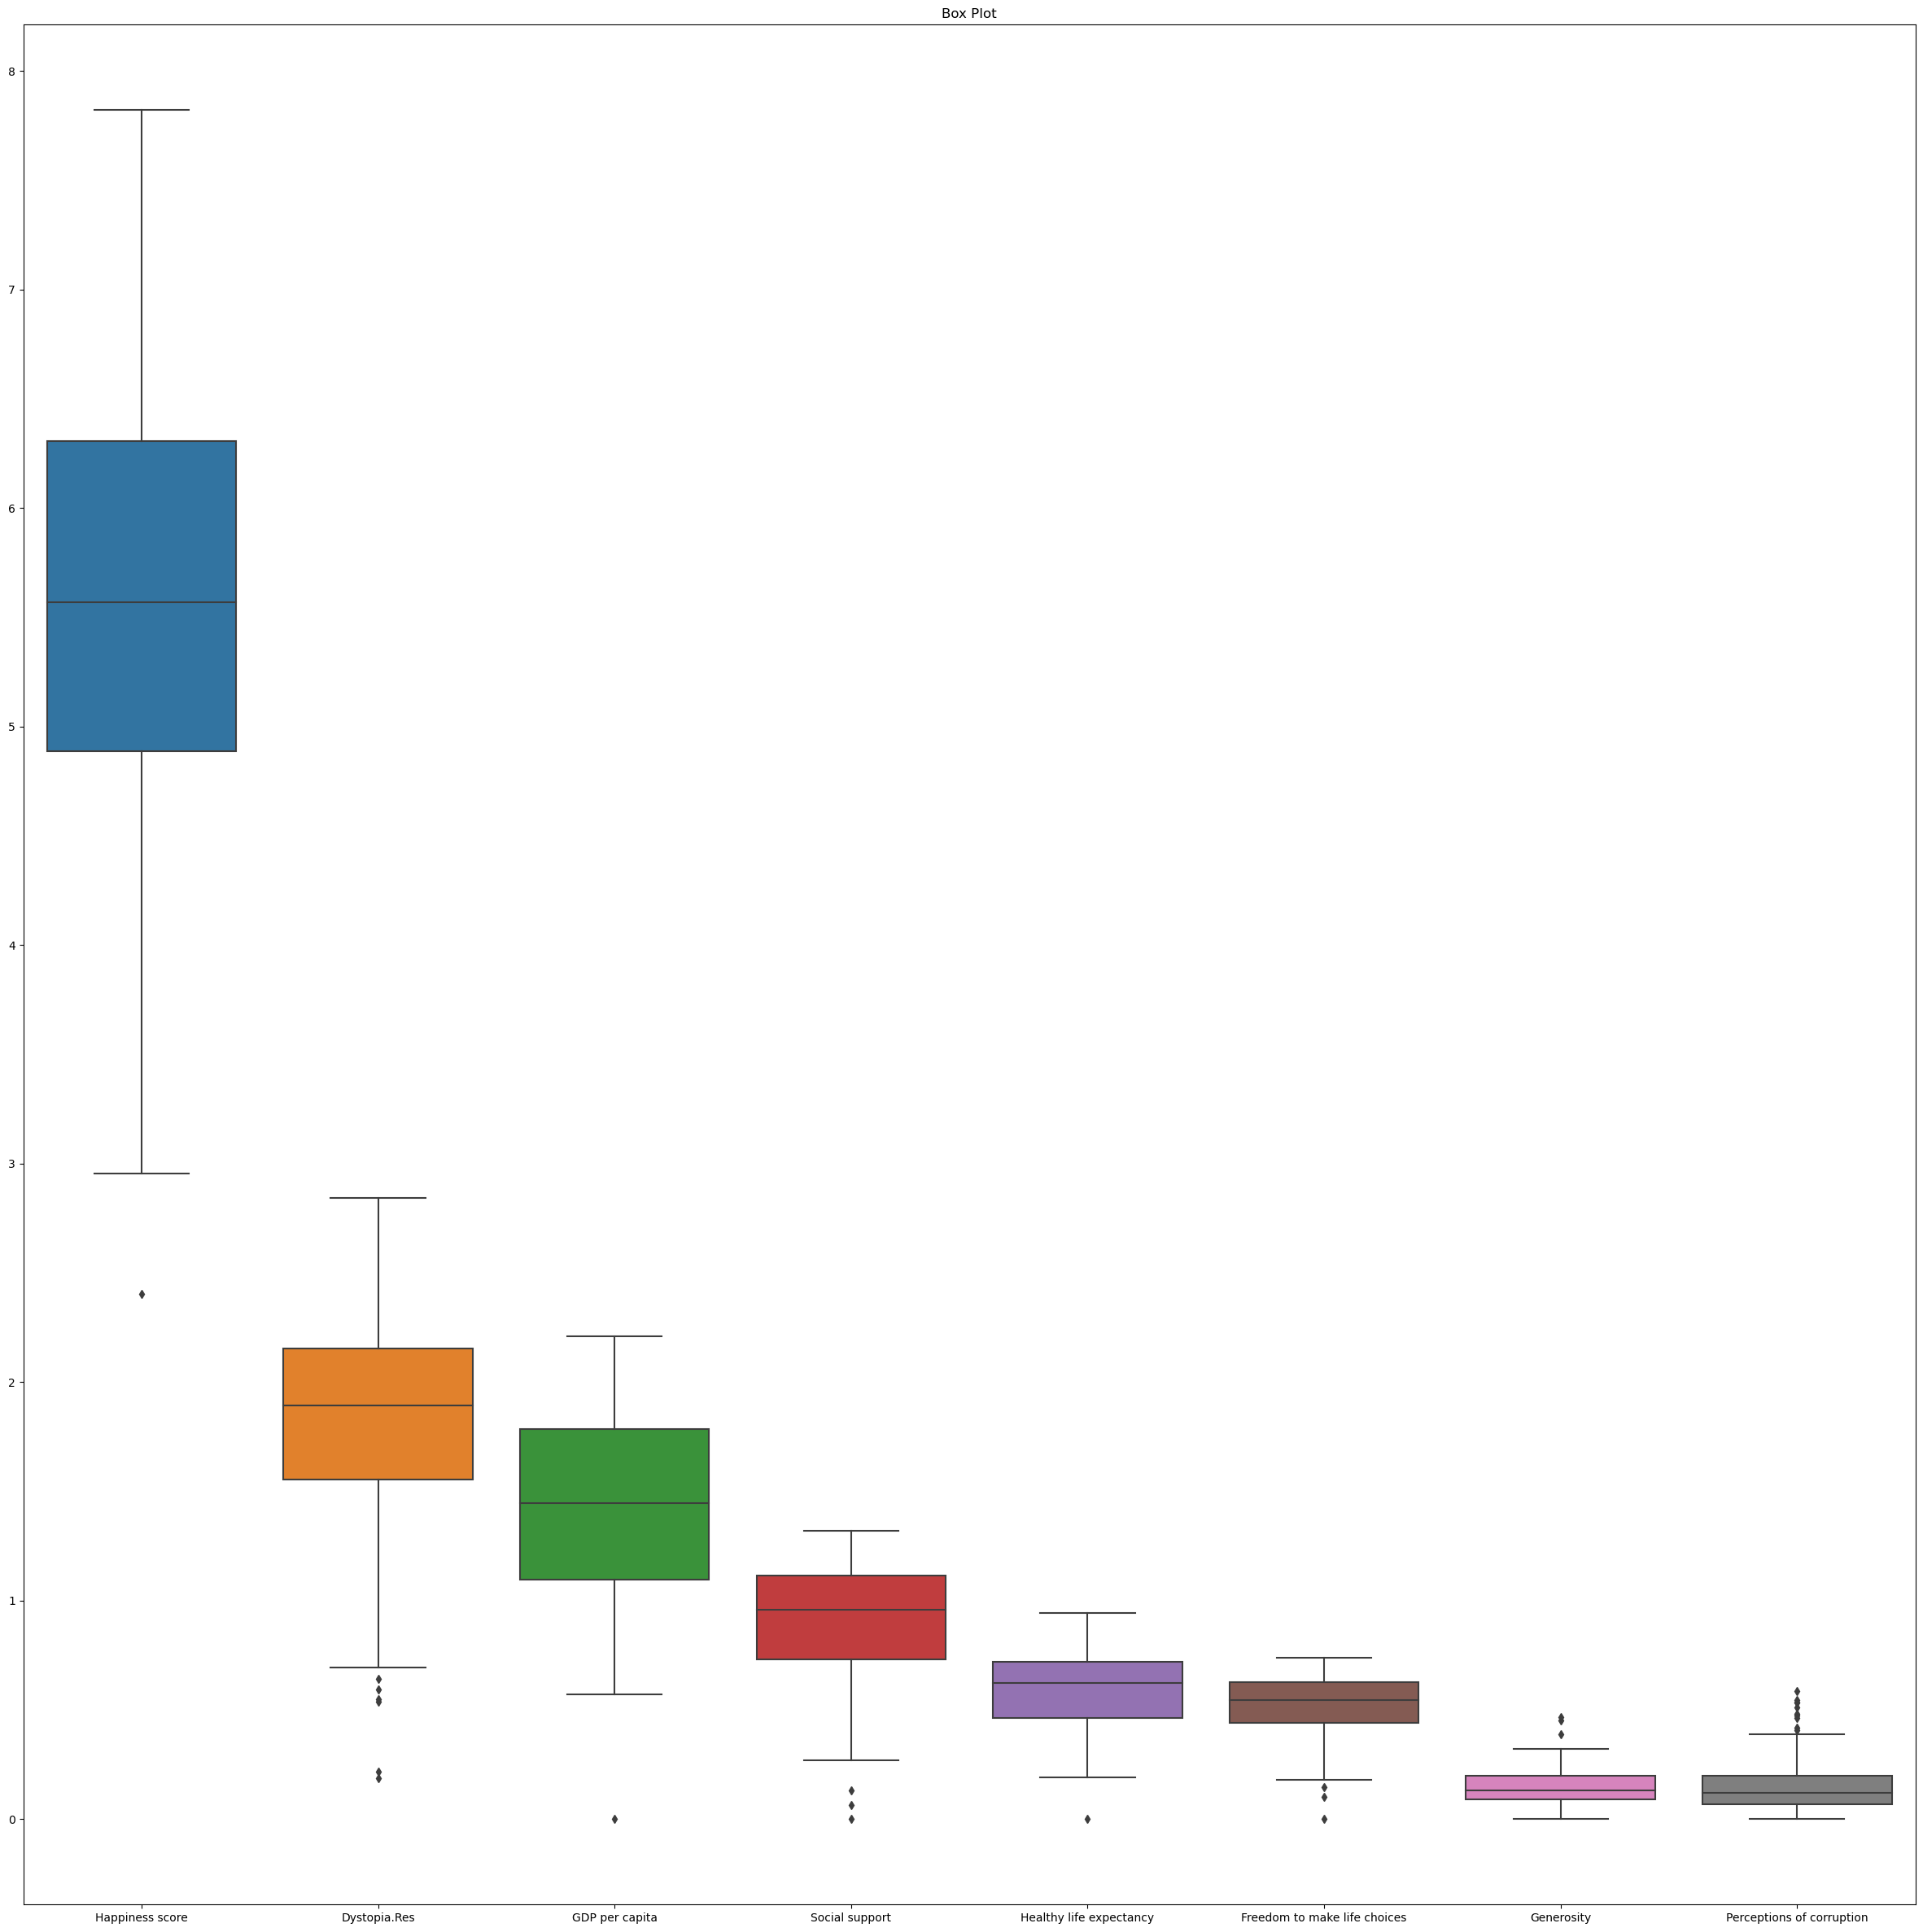

In [8]:
plt.figure(figsize=(30,30))
sns.boxplot(data=df[['Happiness score','Dystopia.Res','GDP per capita','Social support','Healthy life expectancy',
                     'Freedom to make life choices','Generosity','Perceptions of corruption']])
plt.title('Box Plot')
plt.show()


Here in Happiness score, GDP per capita and Healthy life expectancy have one outlier each. Social support, Freedom to make life choices and Generosity have three outliers. Dystopia (1.83) + residual and Perceptions of corruption have 5 outliers.

**Distribution of data for all numerical attributes**

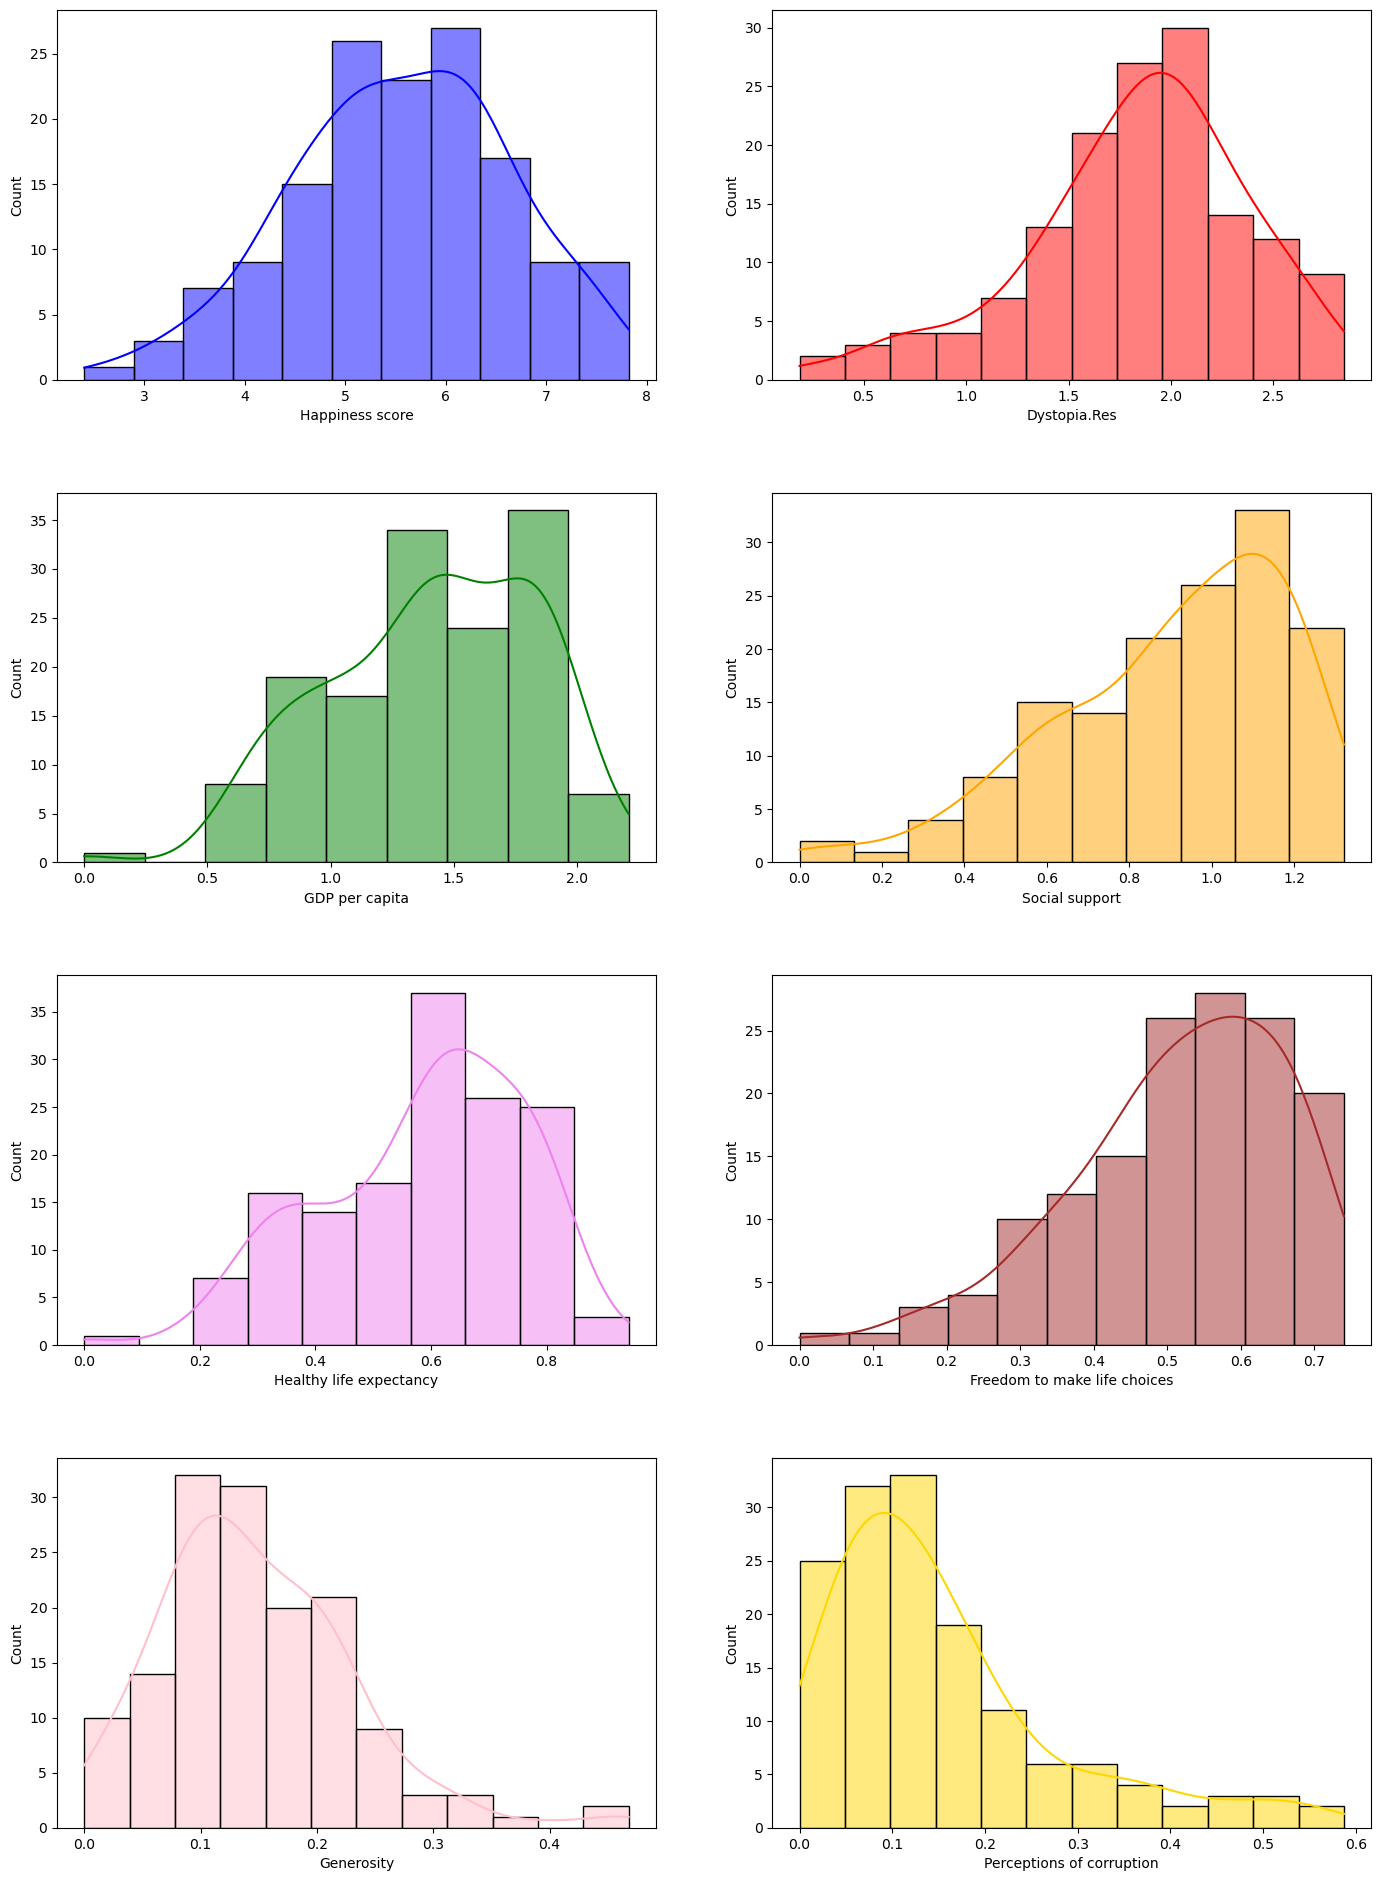

In [9]:
# create subplots
fig = plt.figure(figsize=(15,20))

# Create histograms using seaborn
plt.subplot(4,2,1)
sns.histplot(data=df, x='Happiness score', color='blue',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,2)
sns.histplot(data=df, x='Dystopia.Res', color='red',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,3)
sns.histplot(data=df, x='GDP per capita', color='green',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,4)
sns.histplot(data=df, x='Social support', color='orange',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,5)
sns.histplot(data=df, x='Healthy life expectancy', color='violet',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,6)
sns.histplot(data=df, x='Freedom to make life choices', color='brown',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,7)
sns.histplot(data=df, x='Generosity', color='pink',kde=True)
plt.ylabel('Count')

plt.subplot(4,2,8)
sns.histplot(data=df, x='Perceptions of corruption', color='gold',kde=True)
plt.ylabel('Count')

#Abjust spacing between subplots
fig.tight_layout(pad=5.0)

# Show the plots
plt.show()

Insights are follows:
1. Happiness score, GDP per capita, Dystopia (1.83) + residual, Healthy life expectancy are some what uniformly distributed. 
2. Social support and Freedom to make life choices are slightly negatively skewed. 
3. Perceptions of corruption and Generosity are positively skewed.

**Correlation between all numerical attributes**

In [10]:
correlation = df[['Happiness score', 'Dystopia.Res', 
                 'GDP per capita', 'Social support', 
                 'Healthy life expectancy', 'Freedom to make life choices', 
                 'Generosity', 'Perceptions of corruption']].corr()
correlation

,Happiness score,Dystopia.Res,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Happiness score,1.000000,0.498990,0.763677,0.777889,0.740260,0.624822,0.063785,0.416216
Dystopia.Res,0.498990,1.000000,-0.073423,0.083606,-0.006886,0.117695,0.066915,-0.051075
GDP per capita,0.763677,-0.073423,1.000000,0.722421,0.815386,0.458591,-0.164472,0.377589
Social support,0.777889,0.083606,0.722421,1.000000,0.666760,0.480466,-0.002339,0.223352
Healthy life expectancy,0.740260,-0.006886,0.815386,0.666760,1.000000,0.433166,-0.098133,0.362626
Freedom to make life choices,0.624822,0.117695,0.458591,0.480466,0.433166,1.000000,0.176800,0.402474
Generosity,0.063785,0.066915,-0.164472,-0.002339,-0.098133,0.176800,1.000000,0.096107
Perceptions of corruption,0.416216,-0.051075,0.377589,0.223352,0.362626,0.402474,0.096107,1.000000


Insight are follows:
1. GDP per capita, social support, Freedom to make life choices and Healthy life expectancy are strongly correlated. This suggests that having strong social ties,economic prosperity, healthy life and being ble to make your own decisions are important factors in happiness.
2. Generosity and perceptions of corruption are negatively correlated.

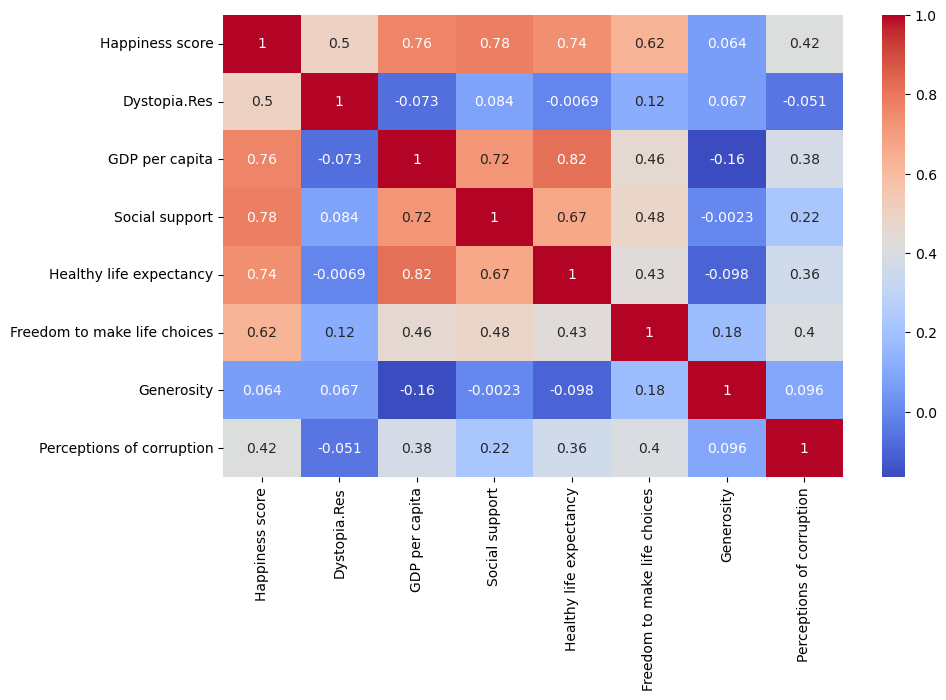

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()